**CARREGANDO BIBLIOTECAS**

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

**CARREGANDO BASE DE DADOS INMET - Santa Vitoria do Palmar - Barra do Chui**

In [2]:
tabela = pd.read_excel('/INMET - S -RS - A899 - Santa Vitoria do Palmar - Barra do Chui 01-01-2015 - a -31-12-2020.xlsx')

**LER DADOS (TABELA)**

In [3]:
# Planilha(INMET - Santa Vitoria do Palmar - Barra do Chui) = Variável (tabela)

tabela.head()

,DATA HORA,PRECIPITAÇÃO TOTAL. HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ.m²),TEMPERATURA DO AR - BULBO SECO. HORARIA (°C),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),UMIDADE RELATIVA DO AR. HORARIA (%),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)","VENTO, VELOCIDADE HORARIA (m/s).1","VENTO, RAJADA MAXIMA (m/s).1"
0,01.01.2015 00:00:00,0.2,1000.2,1000.4,999.9,0.0,23.7,22.8,23.7,23.4,22.8,22.4,95,94,95,36,7.4,3.6,3.6,7.4
1,01.01.2015 01:00:00,0.0,1000.9,1000.9,1000.2,0.0,23.3,22.1,23.7,23.2,22.8,22.1,95,93,93,23,6.0,1.6,1.6,6.0
2,01.01.2015 02:00:00,0.0,1001.1,1001.1,1000.7,0.0,23.3,21.9,23.3,23.1,22.1,21.9,93,92,92,14,3.9,2.1,2.1,3.9
3,01.01.2015 03:00:00,0.0,1001.1,1001.2,1000.9,0.0,23.1,22.0,23.3,23.0,22.0,21.7,93,92,93,340,3.9,1.6,1.6,3.9
4,01.01.2015 04:00:00,0.0,1000.5,1001.4,1000.5,0.0,22.8,21.9,23.2,22.7,22.1,21.8,95,93,95,341,3.8,1.2,1.2,3.8


**PREPARAR COLUNA "DATA E HORA"(FORMATO: DD/MM/AA, HH:MM:SS) PARA USO DA VARIÁVEL "date_time"**

In [4]:
# Para visualizar somente algumas linhas da tabela:

tabela = tabela[3::15]

# Usando função "datetime" da biblioteca "pandas(pd)" na variável "tabela":

date_time = pd.to_datetime(tabela.pop('DATA HORA'), format='%d.%m.%Y %H:%M:%S')

**EXIBINDO AMOSTRA DE TABELA**

In [5]:
tabela.head()

,PRECIPITAÇÃO TOTAL. HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ.m²),TEMPERATURA DO AR - BULBO SECO. HORARIA (°C),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),UMIDADE RELATIVA DO AR. HORARIA (%),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)","VENTO, VELOCIDADE HORARIA (m/s).1","VENTO, RAJADA MAXIMA (m/s).1"
3,0.0,1001.1,1001.2,1000.9,0.0,23.1,22.0,23.3,23.0,22.0,21.7,93,92,93,340,3.9,1.6,1.6,3.9
18,0.0,1000.1,1000.4,999.5,1011.1,24.8,21.6,27.5,24.8,21.9,21.3,82,71,82,124,7.5,5.8,5.8,7.5
33,0.0,1007.6,1007.6,1006.5,37.0,14.1,11.8,14.1,13.9,11.8,11.4,86,85,86,268,8.9,4.3,4.3,8.9
48,0.0,1013.5,1013.5,1012.8,0.0,18.2,9.8,19.8,18.2,10.7,9.8,59,55,58,222,7.4,2.7,2.7,7.4
63,0.0,1014.2,1014.7,1014.2,0.0,24.0,11.7,24.5,23.1,13.7,11.0,52,44,46,293,8.9,4.3,4.3,8.9


**VERIFICANDO LEITURAS NO ANO DE 2020** (**VARIÁVEIS CLIMÁTICAS X DATA/HORA**)  

<Figure size 7200x7200 with 0 Axes>

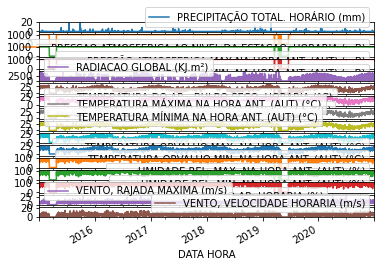

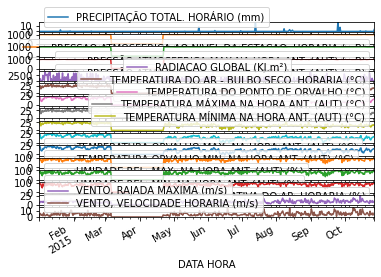

In [6]:
# plot_cols = ['PRECIPITAÇÃO TOTAL. HORÁRIO (mm)','PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB)','PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)','PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)','RADIACAO GLOBAL (KJ.m²)','TEMPERATURA DO AR - BULBO SECO. HORARIA (°C)','TEMPERATURA DO PONTO DE ORVALHO (°C)','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)','TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)','TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)','TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)','UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)','UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)','UMIDADE RELATIVA DO AR. HORARIA (%)','VENTO, RAJADA MAXIMA (m/s)','VENTO, VELOCIDADE HORARIA (m/s)']

plt.figure(figsize=(100, 100)) # Ajsutar as proporções da figura.

plot_cols = ['PRECIPITAÇÃO TOTAL. HORÁRIO (mm)','PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB)','PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)','PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)','RADIACAO GLOBAL (KJ.m²)','TEMPERATURA DO AR - BULBO SECO. HORARIA (°C)','TEMPERATURA DO PONTO DE ORVALHO (°C)','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)','TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)','TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)','TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)','UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)','UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)','UMIDADE RELATIVA DO AR. HORARIA (%)','VENTO, RAJADA MAXIMA (m/s)','VENTO, VELOCIDADE HORARIA (m/s)']
plot_features = tabela[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = tabela[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)



**INSPEÇÃO ESTÁTISTICA DOS DADOS NA TABELA**

In [7]:
tabela.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PRECIPITAÇÃO TOTAL. HORÁRIO (mm),3507.0,0.119076,0.831324,0.0,0.0,0.0,0.0,20.0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),3507.0,965.326062,218.666886,0.0,1009.9,1014.4,1018.9,1033.1
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),3507.0,965.291759,219.328426,0.0,1010.2,1014.6,1019.1,1033.1
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),3507.0,964.771514,219.213379,0.0,1009.6,1014.2,1018.6,1032.5
RADIACAO GLOBAL (KJ.m²),3507.0,508.128315,953.302821,0.0,0.0,0.0,539.3,4457.9
TEMPERATURA DO AR - BULBO SECO. HORARIA (°C),3507.0,16.505104,6.409247,0.0,12.8,17.1,21.3,34.2
TEMPERATURA DO PONTO DE ORVALHO (°C),3507.0,13.550356,5.766335,-2.8,10.2,14.1,17.9,25.7
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),3507.0,16.973482,6.540380,0.0,13.1,17.6,21.8,36.4
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),3507.0,16.062903,6.305462,0.0,12.5,16.6,20.9,34.2
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),3507.0,14.011206,5.812660,-1.2,10.7,14.6,18.4,26.1


**CONVERTENDO VALORES DE VENTO EM ÂNGULO PARA VETOR COM VALORES EM RADIANOS**

Text(0, 0.5, 'Velocidade do Vento [m/s]')

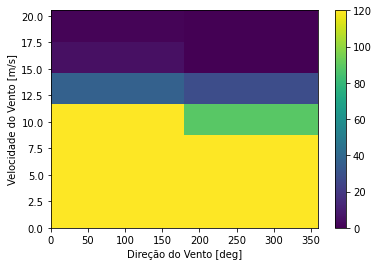

In [8]:
plt.hist2d(tabela['VENTO, DIREÇÃO HORARIA (gr) (° (gr))'], tabela['VENTO, VELOCIDADE HORARIA (m/s).1'], bins=(2, 7), vmax=120)
plt.colorbar()
plt.xlabel('Direção do Vento [deg]')
plt.ylabel('Velocidade do Vento [m/s]')

In [9]:
wv = tabela.pop('VENTO, VELOCIDADE HORARIA (m/s).1')
max_wv = tabela.pop('VENTO, RAJADA MAXIMA (m/s).1')

# Convert to radians.
wd_rad = tabela.pop('VENTO, DIREÇÃO HORARIA (gr) (° (gr))')*np.pi / 180

# Calculate the wind x and y components.
tabela['Wx'] = wv*np.cos(wd_rad)
tabela['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
tabela['max Wx'] = max_wv*np.cos(wd_rad)
tabela['max Wy'] = max_wv*np.sin(wd_rad)

(-20.300495409202192,
 11.236609129003991,
 -10.271958742189433,
 12.859316103164398)

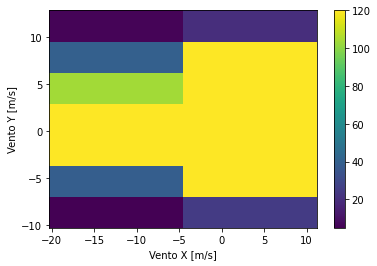

In [10]:
plt.hist2d(tabela['Wx'], tabela['Wy'], bins=(2, 7), vmax=120)
plt.colorbar()
plt.xlabel('Vento X [m/s]')
plt.ylabel('Vento Y [m/s]')
ax = plt.gca()
ax.axis('tight')

**VERIFICANDO A CORRELAÇÃO ENTRE OS DADOS DA TABELA**

<function matplotlib.pyplot.show>

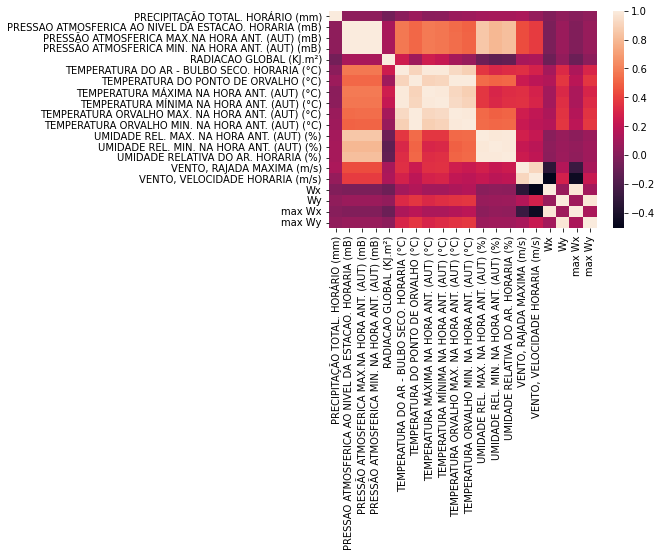

In [11]:
sns.heatmap(tabela.corr())

# Variáveis diferentes, quando comaparadas, tiverem valores próximos de 1, significa que elas tem uma correlação direta .
# Variáveis diferentes, quando comparadas, tiverem valores próximos a -1, significa que elas tem uma correlação de inversa.

plt.show

<function matplotlib.pyplot.show>

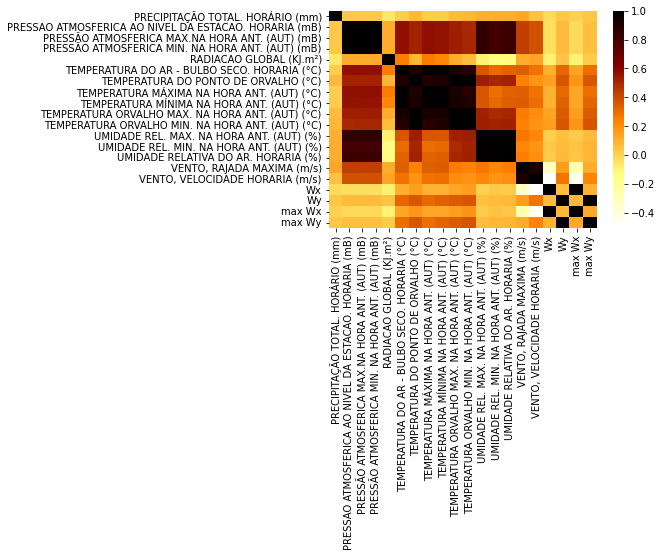

In [12]:
sns.heatmap(tabela.corr(), cmap="afmhot_r")
plt.show

#PRGn_r
#ocean_r
#rainbow_r
#afmhot_r


<function matplotlib.pyplot.show>

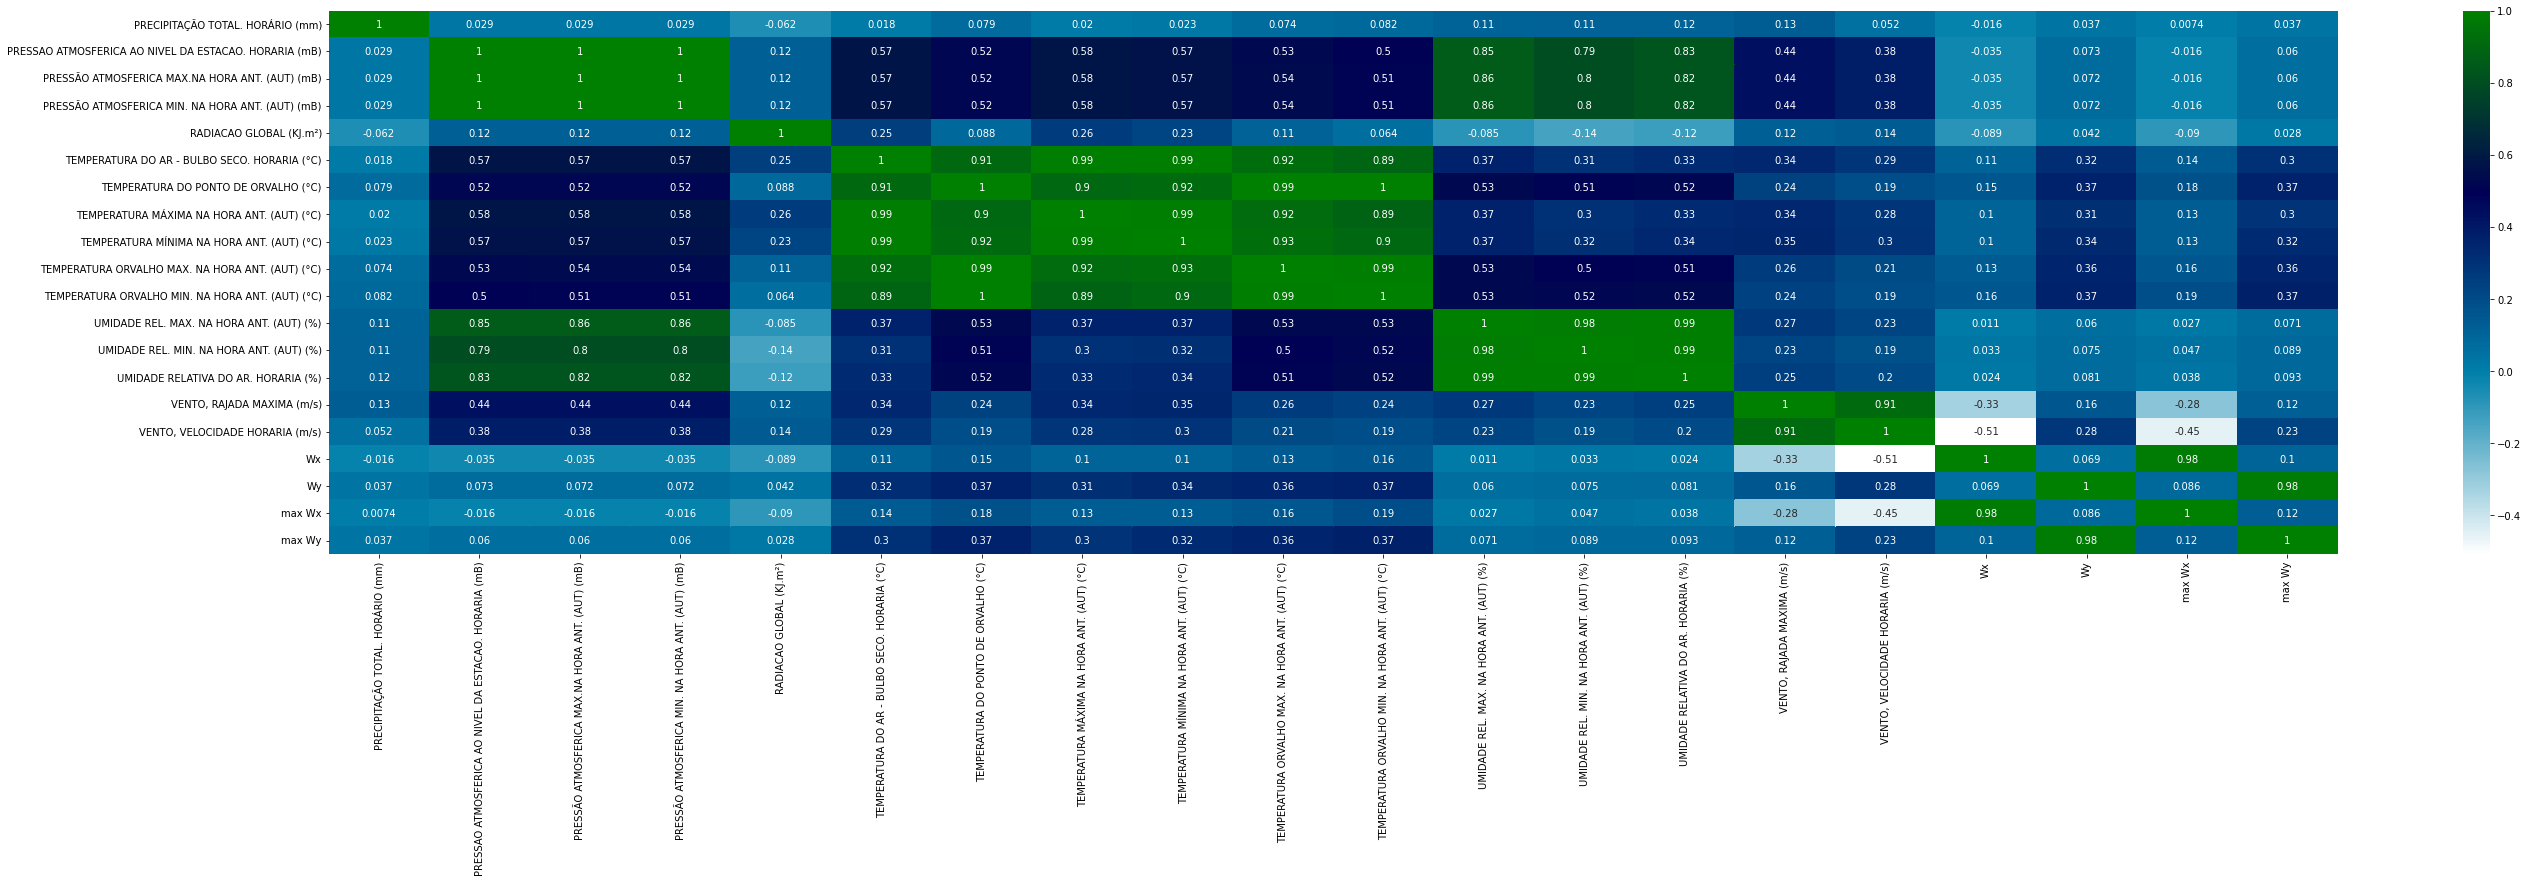

In [13]:
plt.figure(figsize=(45, 10)) # Ajustando as proporções da figura.

sns.heatmap(tabela.corr(), annot = True, cmap="ocean_r")
plt.show

**EXIBINDO A CORRELAÇÃO EM TABELA**

In [14]:
tabela.corr()

,PRECIPITAÇÃO TOTAL. HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ.m²),TEMPERATURA DO AR - BULBO SECO. HORARIA (°C),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),UMIDADE RELATIVA DO AR. HORARIA (%),"VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Wx,Wy,max Wx,max Wy
PRECIPITAÇÃO TOTAL. HORÁRIO (mm),1.000000,0.028700,0.029157,0.028502,-0.061809,0.018055,0.079086,0.019770,0.023337,0.074457,0.081836,0.106279,0.110788,0.115089,0.128620,0.052055,-0.015730,0.036958,0.007351,0.037289
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),0.028700,1.000000,0.996920,0.996920,0.121773,0.573163,0.520285,0.577628,0.566589,0.533961,0.504379,0.853872,0.794723,0.825104,0.437300,0.384099,-0.035180,0.072809,-0.016198,0.059909
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),0.029157,0.996920,1.000000,0.999998,0.120563,0.570218,0.519370,0.579611,0.568542,0.535842,0.506171,0.856550,0.797225,0.824759,0.438829,0.383815,-0.034617,0.072147,-0.015888,0.060394
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),0.028502,0.996920,0.999998,1.000000,0.120706,0.570215,0.519260,0.579603,0.568529,0.535732,0.506054,0.856393,0.797061,0.824593,0.438352,0.383519,-0.034534,0.072114,-0.015833,0.060352
RADIACAO GLOBAL (KJ.m²),-0.061809,0.121773,0.120563,0.120706,1.000000,0.252340,0.088349,0.258087,0.227175,0.110957,0.064053,-0.084660,-0.138714,-0.122423,0.119163,0.135574,-0.089472,0.042157,-0.089715,0.027689
TEMPERATURA DO AR - BULBO SECO. HORARIA (°C),0.018055,0.573163,0.570218,0.570215,0.252340,1.000000,0.911303,0.993420,0.992680,0.923994,0.893387,0.367071,0.307296,0.332077,0.340802,0.285867,0.109237,0.320471,0.138486,0.304768
TEMPERATURA DO PONTO DE ORVALHO (°C),0.079086,0.520285,0.519370,0.519260,0.088349,0.911303,1.000000,0.901303,0.915510,0.994826,0.995000,0.529309,0.507669,0.519840,0.241318,0.191952,0.154217,0.367975,0.183190,0.369655
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),0.019770,0.577628,0.579611,0.579603,0.258087,0.993420,0.901303,1.000000,0.992577,0.920395,0.885318,0.367755,0.300839,0.332118,0.343407,0.282646,0.104665,0.310944,0.132339,0.295423
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),0.023337,0.566589,0.568542,0.568529,0.227175,0.992680,0.915510,0.992577,1.000000,0.929972,0.904884,0.369443,0.316314,0.341289,0.351086,0.296585,0.100273,0.339199,0.130672,0.324271
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),0.074457,0.533961,0.535842,0.535732,0.110957,0.923994,0.994826,0.920395,0.929972,1.000000,0.991629,0.527024,0.496596,0.508722,0.259823,0.208967,0.134375,0.355241,0.163383,0.355890


**AJUSTANDO UNIDADE DA VARIÁVEL DIREÇÃO DO VENTO, DE ÂNGULO PARA RADIANOS**

**AJUSTANDO COLUNA "DATA HORA", PASSANDO DE CLASSIFICAÇÃO "STRING" PARA VALOR EM SEGUNDOS**

In [15]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [16]:
day = 24*60*60
year = (365.2425)*day

tabela['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
tabela['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
tabela['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
tabela['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

**EXIBINDO GRÁFICO NO AJUSTE DE "DATA HORA" E VERIFICANDO PERIODICIDADE**

Text(0.5, 1.0, 'Time of day signal')

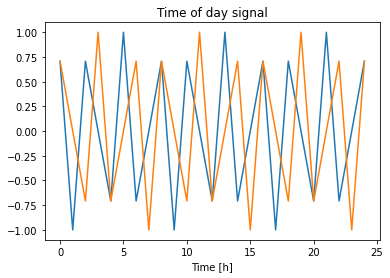

In [17]:
plt.plot(np.array(tabela['Day sin'])[:25])
plt.plot(np.array(tabela['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')


#OBS: SINAIS COM MUDANÇAS BARUPTAS POIS OS DADOS DA TABELA FORAM COLETADOS PRECISAMENTE DE HORA EM HORA.

**FREQUÊNCIAS IMPORTANTES EXTRAÍDAS POR ANÁLISE DE FOURRIER**

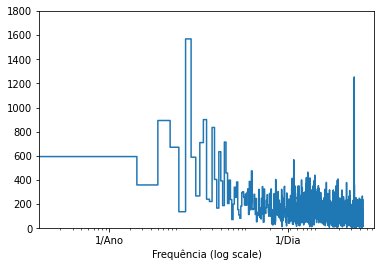

In [18]:
fft = tf.signal.rfft(tabela['VENTO, VELOCIDADE HORARIA (m/s)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(tabela['TEMPERATURA DO AR - BULBO SECO. HORARIA (°C)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 1800)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Ano', '1/Dia'])
_ = plt.xlabel('Frequência (log scale)')

**DIVISÃO DOS DADOS PARA CONJUNTOS DE TREINAMENTO**

In [19]:
column_indices = {name: i for i, name in enumerate(tabela.columns)}

n = len(tabela)
train_tabela = tabela[0:int(n*0.7)]
val_tabela = tabela[int(n*0.7):int(n*0.9)]
test_tabela = tabela[int(n*0.9):]

num_features = tabela.shape[1]

**NORMALIZANDO DADOS**

In [20]:
train_mean = train_tabela.mean()
train_std = train_tabela.std()

train_tabela = (train_tabela - train_mean) / train_std
val_tabela = (val_tabela - train_mean) / train_std
test_tabela = (test_tabela - train_mean) / train_std

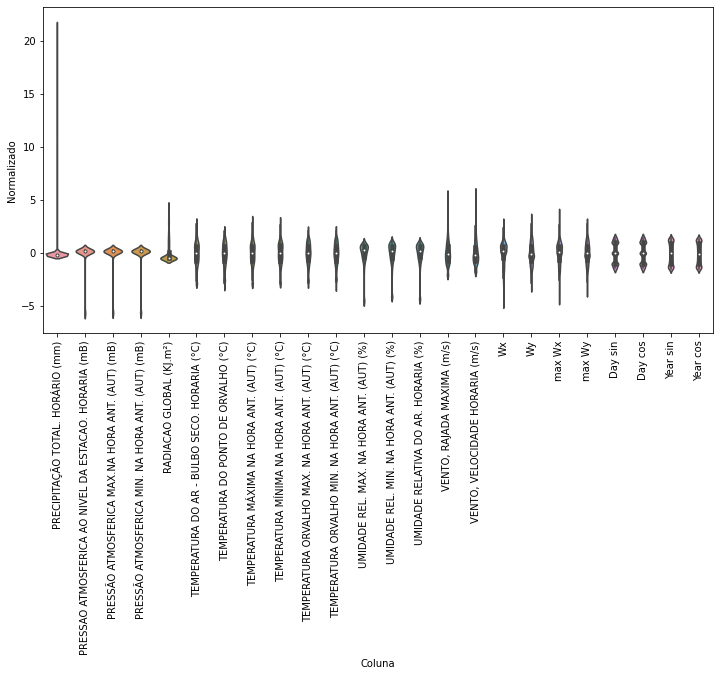

In [21]:
tabela_std = (tabela - train_mean) / train_std
tabela_std = tabela_std.melt(var_name='Coluna', value_name='Normalizado')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Coluna', y='Normalizado', data=tabela_std)
_ = ax.set_xticklabels(tabela.keys(), rotation=90)

**CRIANDO JANELAS DE DADOS E WINDOW GENERATOR**

In [22]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_tabela=train_tabela, val_tabela=val_tabela, test_tabela=test_tabela,
               label_columns=None):
    # Store the raw data.
    self.train_tabela = train_tabela
    self.val_tabela = val_tabela
    self.test_tabela = test_tabela

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_tabela.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

**PREVER 24 HORAS NO FUTURO, DADOS 24 HORAS NO PASSADO**

In [23]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['VENTO, VELOCIDADE HORARIA (m/s)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['VENTO, VELOCIDADE HORARIA (m/s)']

**PREVER 1 HORA NO FUTURO, DADOS 6 HORAS NO PASSADO**

In [24]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['VENTO, VELOCIDADE HORARIA (m/s)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['VENTO, VELOCIDADE HORARIA (m/s)']

**CRIANDO AS DIVISÕES DE LEITURA**

In [25]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [26]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_tabela[:w2.total_window_size]),
                           np.array(train_tabela[100:100+w2.total_window_size]),
                           np.array(train_tabela[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 24)
Inputs shape: (3, 6, 24)
Labels shape: (3, 1, 1)


**PLOTANDO**


In [27]:
w2.example = example_inputs, example_labels

In [28]:
def plot(self, model=None, plot_col='VENTO, VELOCIDADE HORARIA (m/s)', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

**EXECUTANDO PREVISÕES**

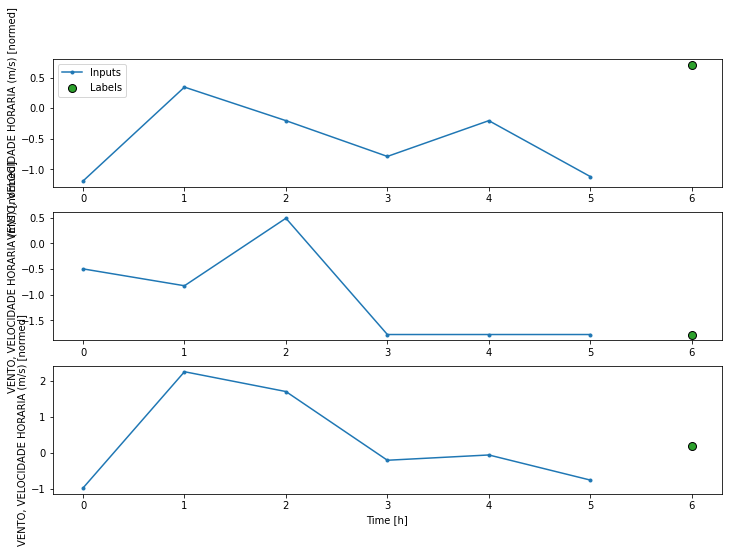

In [29]:
w2.plot()

**CRIANDO: TF.DATA.DATASET**

In [30]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [31]:
@property
def train(self):
  return self.make_dataset(self.train_tabela)

@property
def val(self):
  return self.make_dataset(self.val_tabela)

@property
def test(self):
  return self.make_dataset(self.test_tabela)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [32]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 24), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [33]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 24)
Labels shape (batch, time, features): (32, 1, 1)


In [34]:
tabela.head()

,PRECIPITAÇÃO TOTAL. HORÁRIO (mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA (mB),PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ.m²),TEMPERATURA DO AR - BULBO SECO. HORARIA (°C),TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),UMIDADE RELATIVA DO AR. HORARIA (%),"VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
3,0.0,1001.1,1001.2,1000.9,0.0,23.1,22.0,23.3,23.0,22.0,21.7,93,92,93,3.9,1.6,1.503508,-0.547232,3.664801,-1.333879,7.071068e-01,7.071068e-01,0.003656,0.999993
18,0.0,1000.1,1000.4,999.5,1011.1,24.8,21.6,27.5,24.8,21.9,21.3,82,71,82,7.5,5.8,-3.243319,4.808418,-4.193947,6.217782,-1.000000e+00,-6.457675e-12,0.014407,0.999896
33,0.0,1007.6,1007.6,1006.5,37.0,14.1,11.8,14.1,13.9,11.8,11.4,86,85,86,8.9,4.3,-0.150068,-4.297381,-0.310606,-8.894578,7.071068e-01,-7.071068e-01,0.025156,0.999684
48,0.0,1013.5,1013.5,1012.8,0.0,18.2,9.8,19.8,18.2,10.7,9.8,59,55,58,7.4,2.7,-2.006491,-1.806653,-5.499272,-4.951566,-4.722481e-12,1.000000e+00,0.035903,0.999355
63,0.0,1014.2,1014.7,1014.2,0.0,24.0,11.7,24.5,23.1,13.7,11.0,52,44,46,8.9,4.3,1.680144,-3.958171,3.477507,-8.192493,-7.071068e-01,-7.071068e-01,0.046646,0.998912


**MODELOS DE ETAPA ÚNICA**

In [35]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['VENTO, VELOCIDADE HORARIA (m/s)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['VENTO, VELOCIDADE HORARIA (m/s)']

In [36]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 24)
Labels shape (batch, time, features): (32, 1, 1)


**LINHA DE BASE**

In [37]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [38]:
baseline = Baseline(label_index=column_indices['VENTO, VELOCIDADE HORARIA (m/s)'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

22/22 [==============================] - 0s 2ms/step - loss: 1.2902 - mean_absolute_error: 0.8134


In [39]:
#Então, criar uma ampla WindowGenerator que gera janelas 24 horas de insumos e etiquetas consecutivos de cada vez.
#O novo wide_window variável não muda a forma como o modelo funciona. O modelo ainda faz previsões uma hora no
#futuro com base em uma única etapa de tempo de entrada. Aqui, o time eixo age como o batch eixo: cada previsão é
#feita independentemente sem interacção entre os intervalos de tempo:


wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['VENTO, VELOCIDADE HORARIA (m/s)'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['VENTO, VELOCIDADE HORARIA (m/s)']

In [40]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 24)
Output shape: (32, 24, 1)


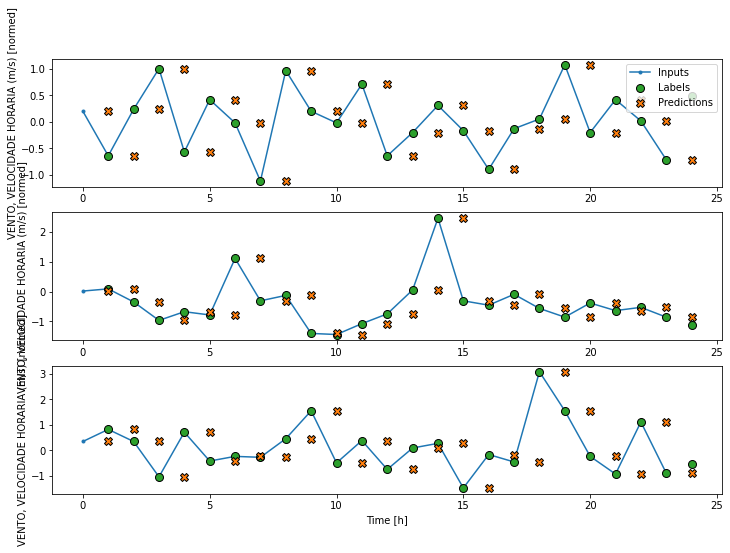

In [41]:
wide_window.plot(baseline)

**MODELO LINEAR**

In [42]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [43]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

**TREINAR MUITOS MODELOS**

In [44]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

**TREINANDO MODELO PARA DESEMPENHO**

In [45]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
77/77 [==============================] - 1s 6ms/step - loss: 1.7147 - mean_absolute_error: 1.0009 - val_loss: 1.6143 - val_mean_absolute_error: 1.0278
Epoch 2/20
77/77 [==============================] - 0s 5ms/step - loss: 1.3803 - mean_absolute_error: 0.9136 - val_loss: 1.2907 - val_mean_absolute_error: 0.9153
Epoch 3/20
77/77 [==============================] - 0s 5ms/step - loss: 1.1873 - mean_absolute_error: 0.8497 - val_loss: 1.1212 - val_mean_absolute_error: 0.8475
Epoch 4/20
77/77 [==============================] - 0s 5ms/step - loss: 1.0533 - mean_absolute_error: 0.8007 - val_loss: 1.0090 - val_mean_absolute_error: 0.7981
Epoch 5/20
77/77 [==============================] - 0s 5ms/step - loss: 0.9623 - mean_absolute_error: 0.7643 - val_loss: 0.9362 - val_mean_absolute_error: 0.7654
Epoch 6/20
77/77 [==============================] - 0s 5ms/step - loss: 0.8993 - mean_absolute_error: 0.7358 - val_loss: 0.8850 - val_mean_absolute_error: 0.7357
Epoch 7/20
77/77 [==========

In [46]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 24)
Output shape: (32, 24, 1)


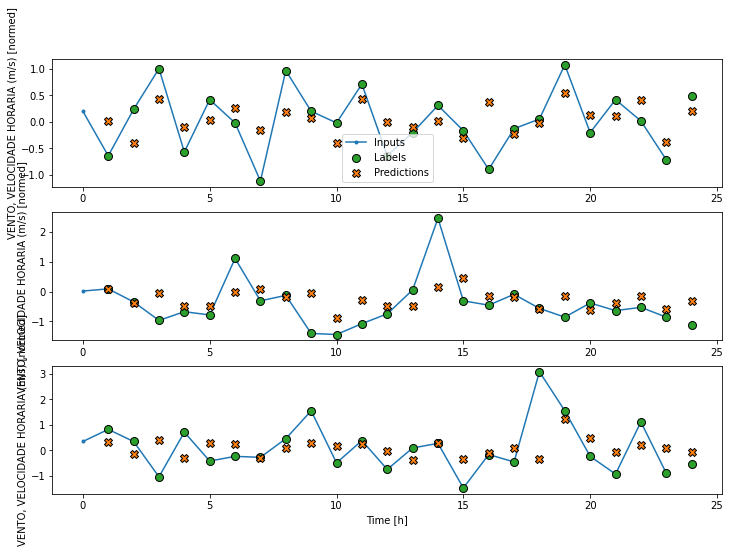

In [47]:
wide_window.plot(linear)

PESO ATRIBUÍDO A CADA ETAPA/MODELO DE PREVISÃO

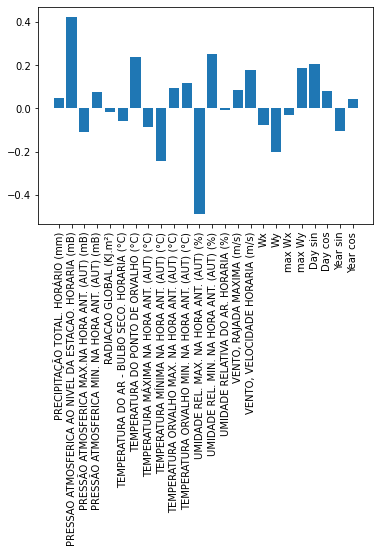

In [48]:
plt.bar(x = range(len(train_tabela.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_tabela.columns)))
_ = axis.set_xticklabels(train_tabela.columns, rotation=90)

**MODELO DENSO**

In [49]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
77/77 [==============================] - 1s 7ms/step - loss: 0.8139 - mean_absolute_error: 0.6856 - val_loss: 0.7650 - val_mean_absolute_error: 0.6408
Epoch 2/20
77/77 [==============================] - 0s 5ms/step - loss: 0.7270 - mean_absolute_error: 0.6453 - val_loss: 0.7537 - val_mean_absolute_error: 0.6328
Epoch 3/20
77/77 [==============================] - 0s 6ms/step - loss: 0.7087 - mean_absolute_error: 0.6334 - val_loss: 0.7561 - val_mean_absolute_error: 0.6313
Epoch 4/20
77/77 [==============================] - 0s 5ms/step - loss: 0.6918 - mean_absolute_error: 0.6241 - val_loss: 0.7454 - val_mean_absolute_error: 0.6246
Epoch 5/20
77/77 [==============================] - 1s 7ms/step - loss: 0.6833 - mean_absolute_error: 0.6220 - val_loss: 0.7629 - val_mean_absolute_error: 0.6441
Epoch 6/20
77/77 [==============================] - 0s 5ms/step - loss: 0.6735 - mean_absolute_error: 0.6159 - val_loss: 0.7414 - val_mean_absolute_error: 0.6175
Epoch 7/20
77/77 [==========

MÚLTIPLAS ETAPAS - DENSO

In [50]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['VENTO, VELOCIDADE HORARIA (m/s)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['VENTO, VELOCIDADE HORARIA (m/s)']

Text(0.5, 1.0, 'Com 3 horas de entradas, preveja 1 hora no futuro.')

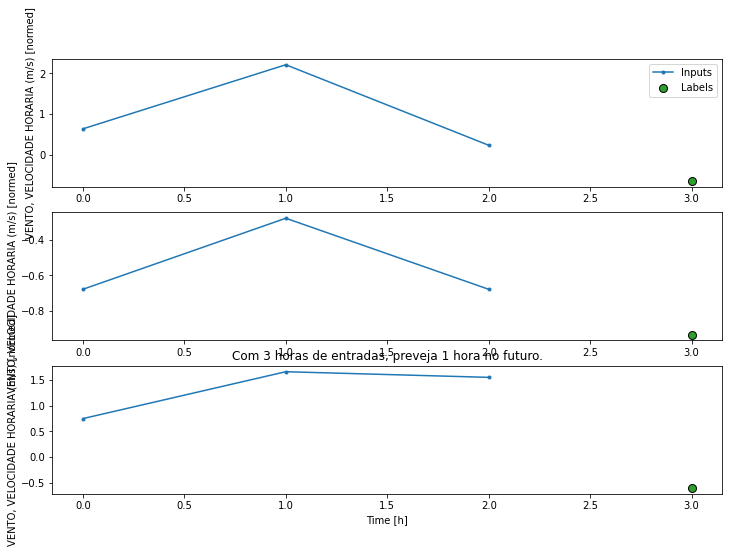

In [51]:
conv_window.plot()
plt.title("Com 3 horas de entradas, preveja 1 hora no futuro.")

In [52]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [53]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 24)
Output shape: (32, 1, 1)


In [54]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

22/22 [==============================] - 0s 3ms/step - loss: 0.7492 - mean_absolute_error: 0.6253


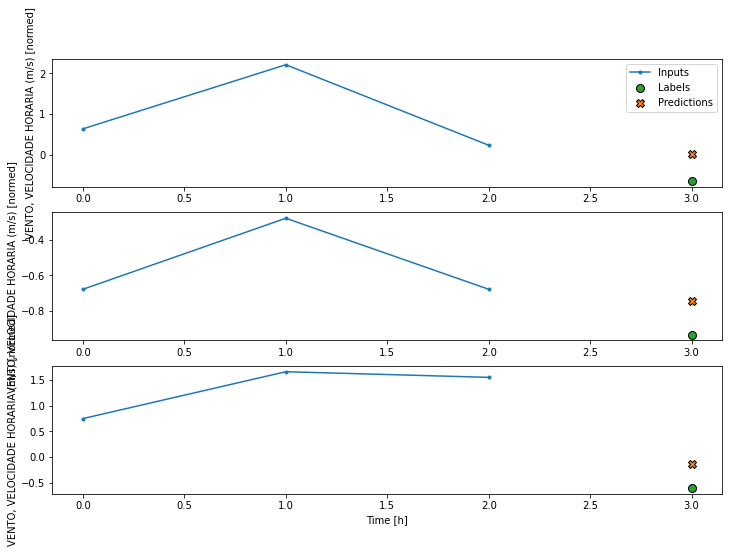

In [55]:
conv_window.plot(multi_step_dense)

In [56]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 24)

ValueError:Exception encountered when calling layer "sequential_3" (type Sequential).

Input 0 of layer "dense_5" is incompatible with the layer: expected axis -1of input shape to have value 72, but received input with shape (32, 576)

Call arguments received:
  • inputs=tf.Tensor(shape=(32, 24, 24), dtype=float32)
  • training=None
  • mask=None


**REDE NEURAL DE CONVOLUÇÃO**

In [57]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [58]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 24)
Output shape: (32, 1, 1)


In [59]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

22/22 [==============================] - 0s 3ms/step - loss: 0.7243 - mean_absolute_error: 0.6191


In [60]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 24)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [61]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['VENTO, VELOCIDADE HORARIA (m/s)'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['VENTO, VELOCIDADE HORARIA (m/s)']

In [62]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 24)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


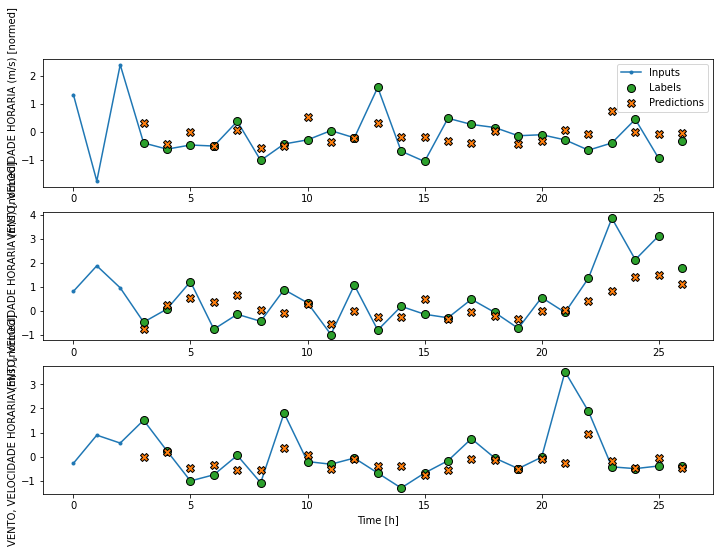

In [63]:
wide_conv_window.plot(conv_model)

**REDE NEURAL RECORRENTE**

In [64]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [65]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [66]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

22/22 [==============================] - 0s 4ms/step - loss: 0.7330 - mean_absolute_error: 0.6243


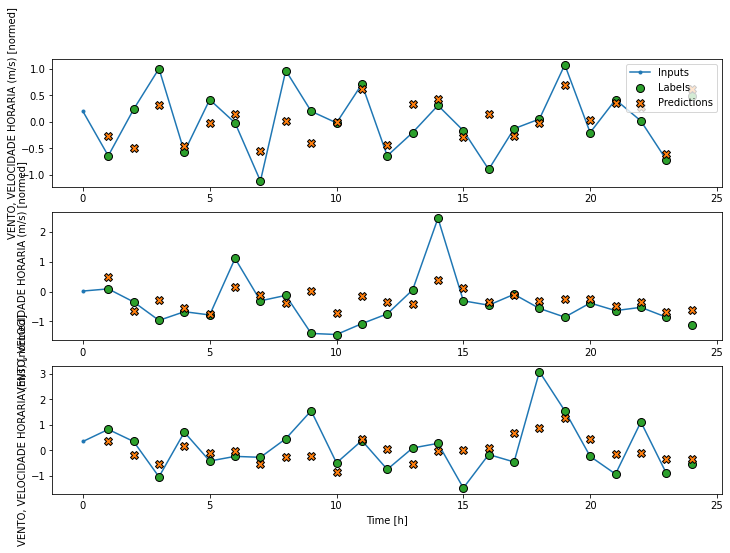

In [67]:
wide_window.plot(lstm_model)

**VERIFICANDO ATUAÇÃO DOS MODELOS**

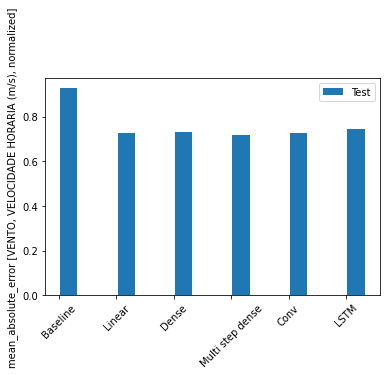

In [68]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [VENTO, VELOCIDADE HORARIA (m/s), normalized]')

plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [69]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.9267
Linear      : 0.7244
Dense       : 0.7312
Multi step dense: 0.7171
Conv        : 0.7283
LSTM        : 0.7455


**MODELOS DE MÚLTIPLAS SAÍDAS**

In [70]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 24)
Labels shape (batch, time, features): (32, 24, 24)


**LINHA DE BASE**

In [71]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [72]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

22/22 [==============================] - 0s 3ms/step - loss: 1.0564 - mean_absolute_error: 0.6061


**DENSO**

In [73]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

22/22 [==============================] - 0s 3ms/step - loss: 1.0564 - mean_absolute_error: 0.6061


In [74]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

**REDE NEURAL RECORRENTE(RNN)**

In [75]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

22/22 [==============================] - 0s 4ms/step - loss: 0.4049 - mean_absolute_error: 0.3641

CPU times: user 26.3 s, sys: 2.55 s, total: 28.8 s
Wall time: 22 s


**CONEXÕES RESIDUAIS**

In [76]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [77]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

**VERIFICANDO ATUAÇÃO - II**

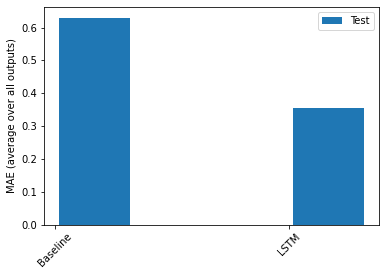

In [78]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
test_mae = [v[metric_index] for v in performance.values()]


plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [79]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.6307
LSTM           : 0.3554


**MODELOS MULTI-ETAPAS**

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

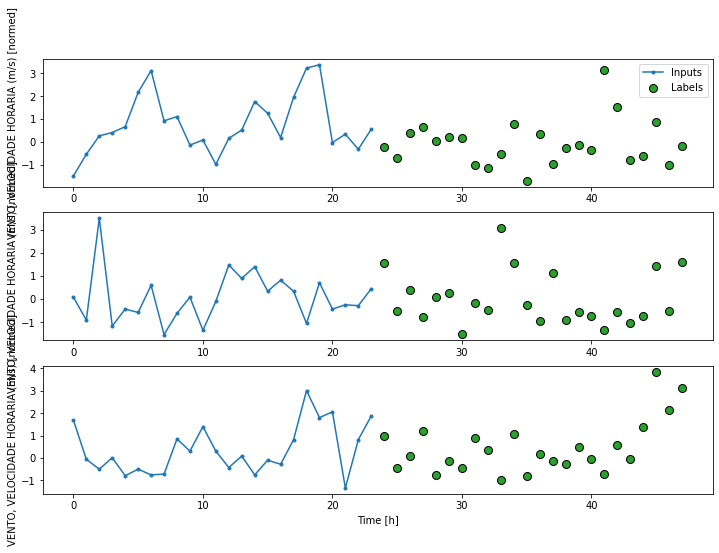

In [80]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

**"BASELINES"**

21/21 [==============================] - 0s 3ms/step - loss: 1.3291 - mean_absolute_error: 0.6924


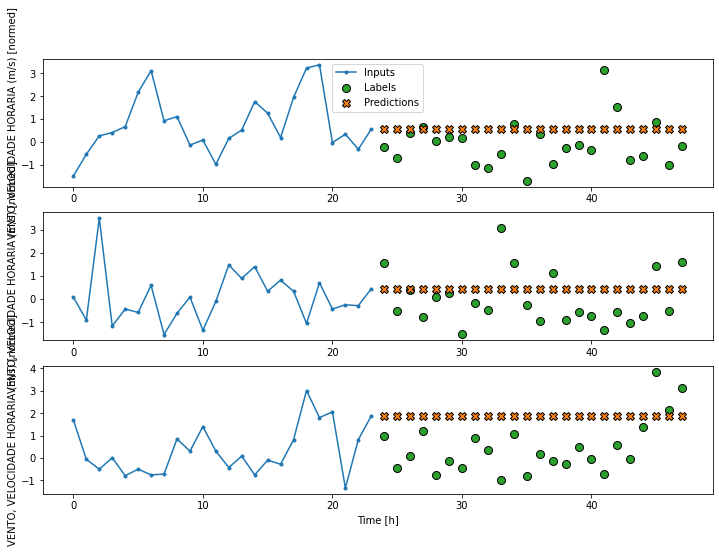

In [81]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

21/21 [==============================] - 0s 3ms/step - loss: 1.3196 - mean_absolute_error: 0.6207


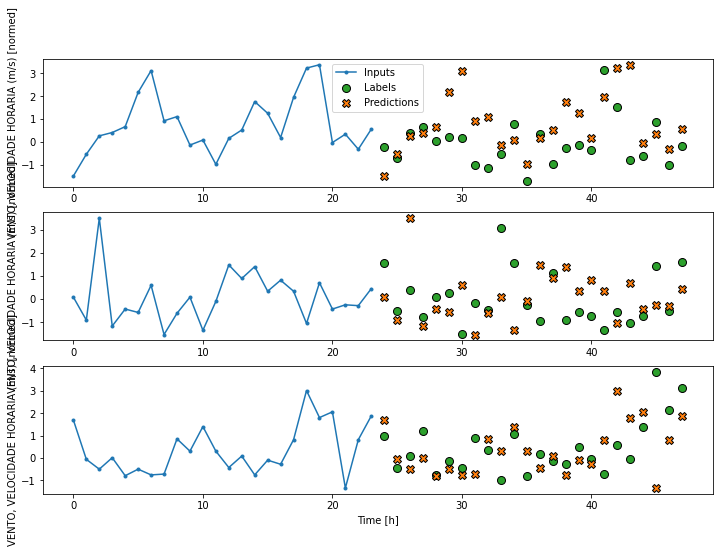

In [82]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

**MODELOS DE DISPARO ÚNICO**

21/21 [==============================] - 0s 2ms/step - loss: 1.3196 - mean_absolute_error: 0.6207


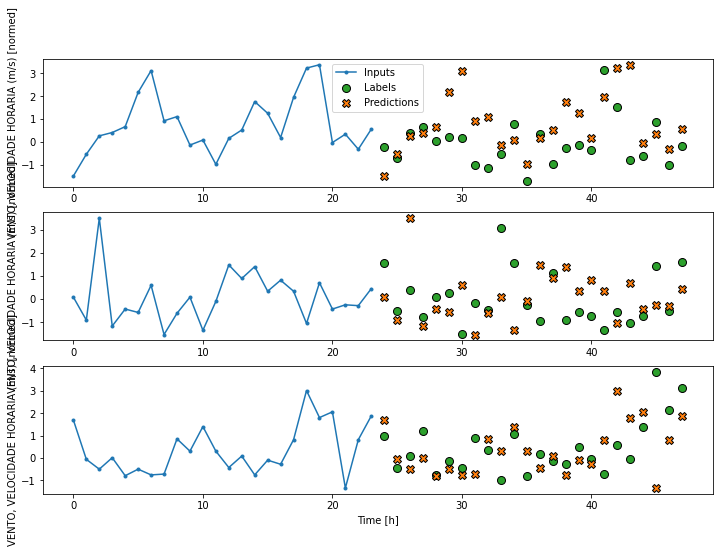

In [83]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

**DENSO**

21/21 [==============================] - 0s 4ms/step - loss: 0.7333 - mean_absolute_error: 0.5106


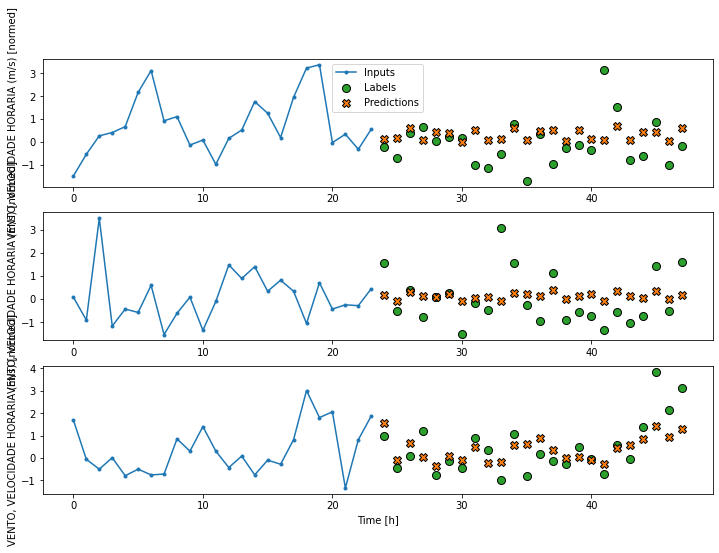

In [84]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

**REDE NEURAL CONVULACIONAL(CNN)**

21/21 [==============================] - 0s 3ms/step - loss: 0.6692 - mean_absolute_error: 0.4962


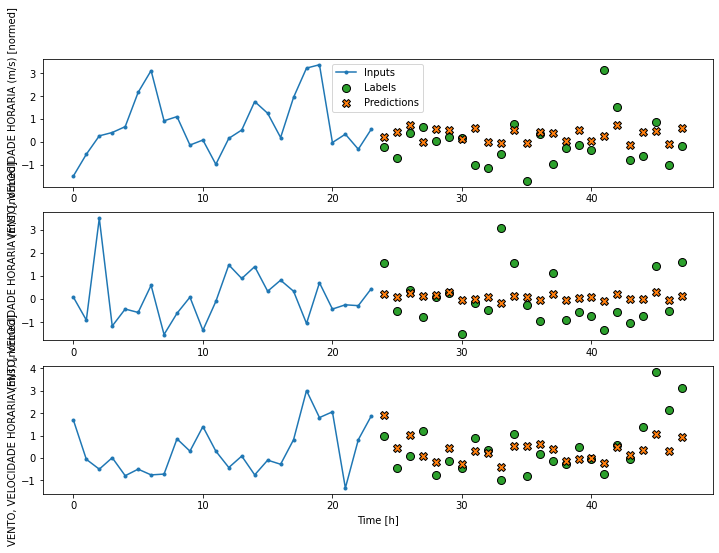

In [85]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

**REDES NEURAIS RECORRENTE(RNN)**

21/21 [==============================] - 0s 4ms/step - loss: 0.7604 - mean_absolute_error: 0.5492


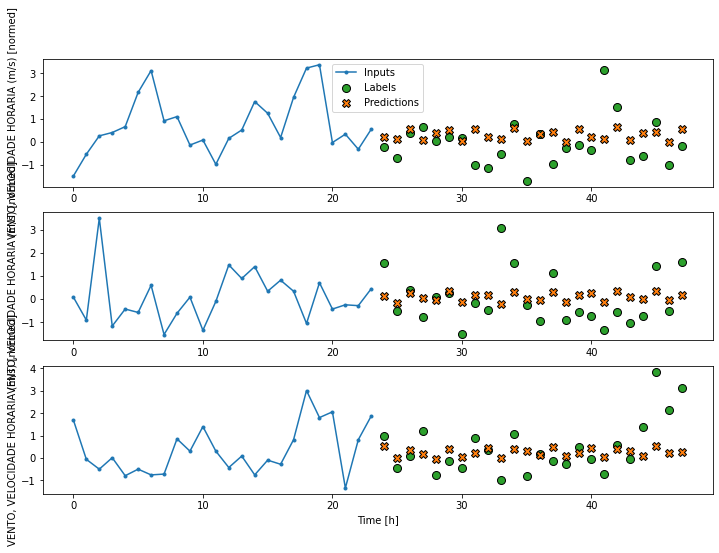

In [86]:
#O modelo acumulará o estado interno por 24 horas, antes de fazer uma única previsão para as próximas 24 horas.

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

**USANDO MODELO AUTOREGRESSIVO**

In [87]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [88]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [89]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [90]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 24])

In [91]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [92]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 24)


**TREINANDO O MODELO**

21/21 [==============================] - 0s 6ms/step - loss: 1.0440 - mean_absolute_error: 0.6922


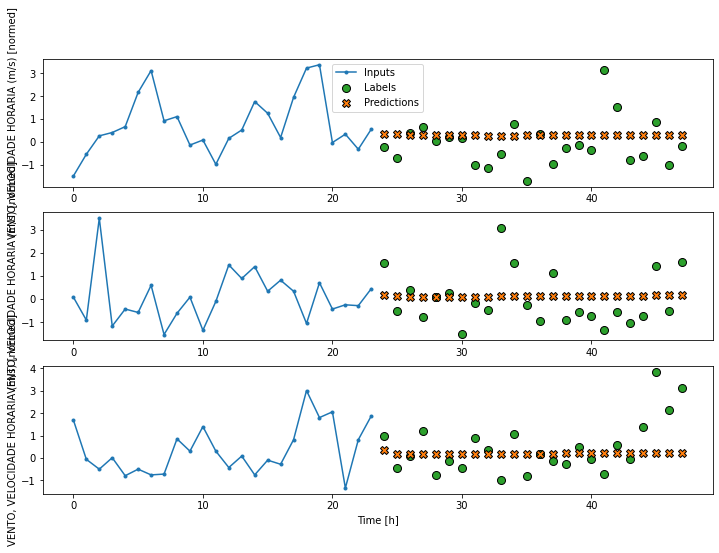

In [93]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

**VERIFICANDO ATUAÇÃO - III**

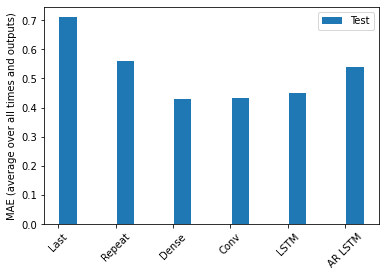

In [94]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
test_mae = [v[metric_index] for v in multi_performance.values()]


plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [95]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.7103
Repeat  : 0.5592
Dense   : 0.4307
Conv    : 0.4326
LSTM    : 0.4492
AR LSTM : 0.5385
